#### Notebook 1: Linear Regression using Ordinary Least Squares

Little Introduction before we go on. Myself Pathik Viramgama (Pr0fess0r) and am doing a 75 days kaggle challenge where I will try rise up to as much high in rank as possible in a total of 300 hours (4 hours per day). So upvote! What we are going to do here is to see what is the mathematical aspect that goes behind in Linear Regression with one variable. This is the **first** notebook in this series of scratch coding. I chose the easy method of formulas so that it can be understood easily. We will progress in the difficulty as we go ahead and will surely cover all the basic ML codes from scratch to the deep learning.

# Importing Dataset 
### and Legen......wait for it......dary Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('..\Data\salary_dataset.csv')
df.head()

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


# Preprocessing Stuff

In [3]:
# Seperating features and target
x = df.drop(['Unnamed: 0', 'Salary'], axis = 1)
y = df.drop(['Unnamed: 0', 'YearsExperience'], axis = 1)

In [4]:
# converting the dataframe to numpy array so that all our data becomes in one format
# I chose numpy array because it is faster
x = pd.DataFrame(x).to_numpy()
y = pd.DataFrame(y).to_numpy()

Yeah I know I am cheating, using a library. But hear me out please. This notebook needs you to focus on how the Linear Regression works with Gradient Descent, not how split occurs. But I have created that pre processing stuff from scratch in another notebook. You can check that out in my profile [here](https://www.kaggle.com/pathikviramgama/code?scroll=true)

In [5]:
# Doing a train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

# Simple Linear Regression with Library

Here we will simply train the model with our data and see what is the accuracy for a reference for our algorithm.

In [6]:
# The easy version
from sklearn.linear_model import LinearRegression

LR = LinearRegression()
LR.fit(x_train, y_train)

LR_weights = LR.coef_[0][0]
LR_b = LR.intercept_[0]

LR_R2 = LR.score(x_test, y_test)
print(f'Coefficient of Determination R2: {LR_R2}')

Coefficient of Determination R2: 0.9553063138044949


Now lets plot a simple graph for our test data and plot our regression line as well

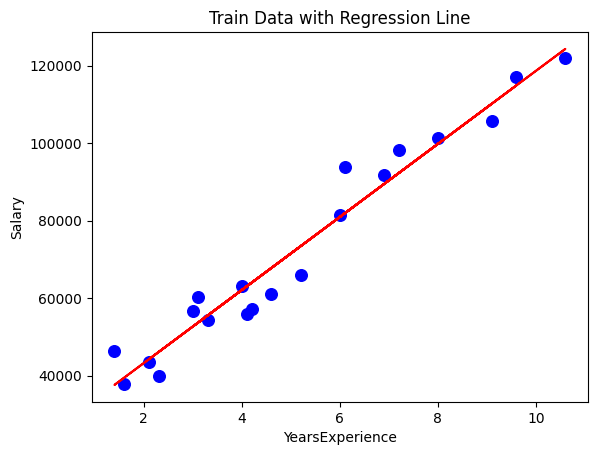

In [7]:
# Plot the line along with our training data points
plt.scatter(x_train, y_train, s=70, c='b')
plt.plot(x_train, (LR_b + LR_weights*x_train), c='r')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.title('Train Data with Regression Line')
plt.show()

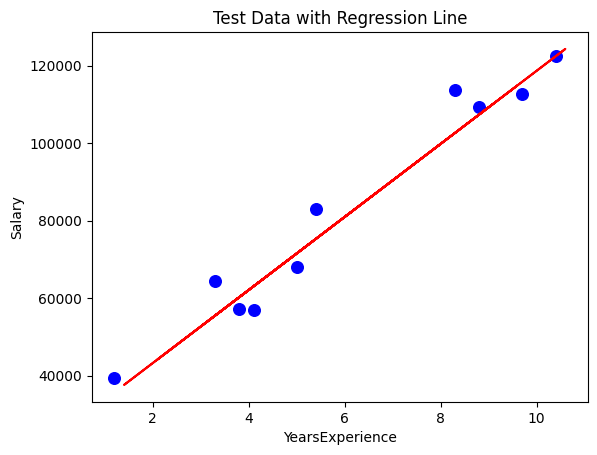

In [8]:
# Plot the line along with our test data points
plt.scatter(x_test, y_test, s=70, c='b')
plt.plot(x_train, (LR_b + LR_weights*x_train), c='r')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.title('Test Data with Regression Line')
plt.show()

# LinearRegression from Scratch with Equation of Line

Here what we are going to do is use the shortcut i.e. use prederived formulas and just put values in it. So for linear regression what we do is generate a line that tries to connect as many dots as possible in the given training dataset. Now these formulas are what were derived from another method which is also there in next section. But all in all we try to minimize the distance of each point collectively as a whole from a certain line. 

Say that line equation is $y = mx + c$. We have the $x$ as the feature and $y$ as the target. The slope $m$ is called the $\beta_{1}$ here and formula for it is as below:

$\LARGE \beta_{1} = \frac{\sum_{i=1}^{n}(x_{i}-\bar{x})(y_{i}-\bar{y})}{\sum_{i=1}^{n}(x_{i}-\bar{x})^{2}}$ 

Yeah. A lot I know. But it is still simpler than what we will be using in the other method so sack it up. The y-intercept $c$ is called the $\beta_{0}$ here and formula for it is pretty simple since we know all other variables:

$\LARGE \beta_{0} = \bar{y} - \beta_{1}\bar{x}$ 

And based on these parameters of regression $\beta_{0}, \beta_{1}$ we will find the equation of line and that will be the best fit in the training dataset that we used to calculate paramterers itself. Equation of line will be:

$\LARGE y = \beta_{1}x + \beta_{0}$ 

So lets calculate all those variables and create the equation of line that is most befitting the given training data.

In [9]:
# Obtaining Linear Regresion Equation
def LinearRegressionEOL(x, y):     
    
    n = len(x) # number of observations
    x_mean = np.mean(x) 
    y_mean = np.mean(y)
    B1_num = 0 # numerator of the big formula of B1
    B1_den = 0 # denomenator of the big formula of B1
    
    # calculating numerator and denomenator of B1 seperately
    for i in range(0, len(x)):
        B1_num += ( (x[i, 0] - x_mean)*(y[i, 0] - y_mean) )
        B1_den += ( (x[i, 0] - x_mean)**2 ) 
    
    # calculating B1
    B1 = B1_num/B1_den
    
    # calculating B0
    B0 = (y_mean - (B1*x_mean))
    
    # calculating equation of line
    linearEquation = f'y = {B1}x + {B0}'
 
    return (B0, B1, linearEquation)

# ...And Action

In [10]:
# Running the code

B0, B1, LinearEquation = LinearRegressionEOL(x_train, y_train)

print(f'Coefficient bias: {B0}')
print(f'Coefficient weights: {B1}')
print(f'Equation of Line L: {LinearEquation}')


Coefficient bias: 24382.73150233685
Coefficient weights: 9426.038769074836
Equation of Line L: y = 9426.038769074836x + 24382.73150233685


In [11]:
# Predicting the output
def prediction(B0, B1, x):
    y = B0 + B1*x
    return y

In [12]:
y_pred = prediction(B0, B1, x_test)
y_pred

array([[115815.30756236],
       [ 71512.92534771],
       [102618.85328566],
       [ 75283.34085534],
       [ 55488.65944028],
       [ 60201.67882482],
       [122413.53470072],
       [107331.8726702 ],
       [ 63029.49045554],
       [ 35693.97802523]])

In [13]:
y_test

array([[112636.],
       [ 67939.],
       [113813.],
       [ 83089.],
       [ 64446.],
       [ 57190.],
       [122392.],
       [109432.],
       [ 56958.],
       [ 39344.]])

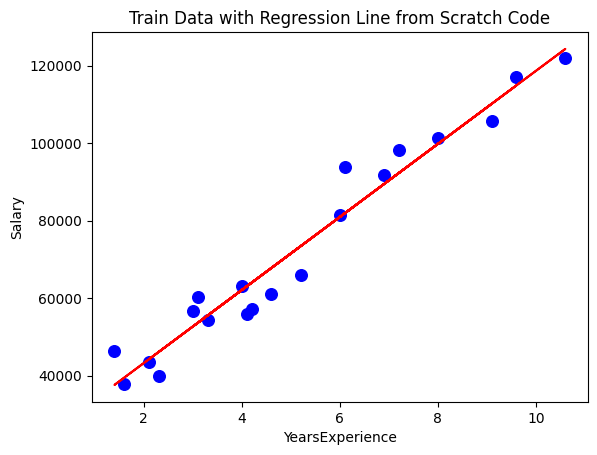

In [14]:
# Plot the line along with our training data points
plt.scatter(x_train, y_train, s=70, c='b')

plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.title('Train Data with Regression Line from Scratch Code')

plt.plot(x_train, (B0 + B1*x_train), c='r')

plt.show()

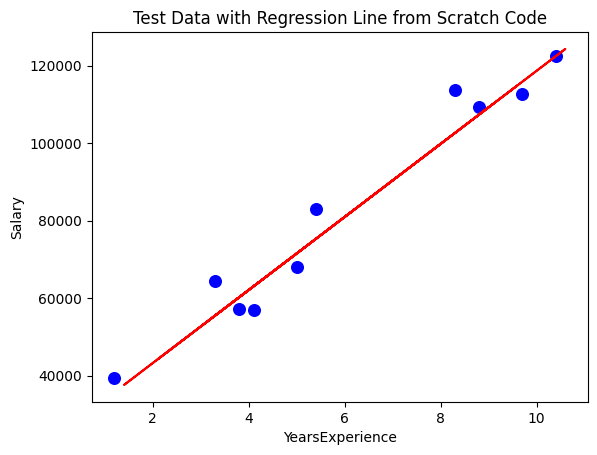

In [15]:
# Plot the line along with our test data points
plt.scatter(x_test, y_test, s=70, c='b')

plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.title('Test Data with Regression Line from Scratch Code')

plt.plot(x_train, (B0 + B1*x_train), c='r')

plt.show()

# Evaluation

Now to see how well our model trained is to calculate the coefficient of determination $R^2$. It is a number between 0 and 1 that measures how well a statistical model predicts an outcome. You can interpret the R² as the proportion of variation in the dependent variable that is predicted by the statistical model And this one is easy. It is literally sqaure of $R$. Here is an easy exaplanation to it. $R$ gives us both the extent our $x$ and $y$ affect each other as well as the direct or indirect proportion (direction) in which it affects. $R^2$ gives just the extent of relation. DO NOT ASSUME IT IS THE ACCURACY. REGRESSION NEVER HAS ACCURACY. IT HAS ONLY ERROR!

Now we have one more great formula that we will be using which is the coefficient of correlation, also known as *Pearson Coefficient* $R$. A correlation coefficient is a number between -1 and 1 that tells you **the strength and direction of a relationship between variables**. In other words, it reflects how similar the measurements of two or more variables are across a dataset. When one variable changes, the other variables change in the same direction. 

Too much? Let me simplify even further. This number $R$ will tell us how will my target $y$ change when I change my $x$. If that didn't clicked your brain, then...here a basic example. Money you have is $x$ and item you have is $y$. Say you want something. R of $x$ and $y$ will be a negative value because if you buy something you desire, you will spend money. So you increase something in your item list but you decrease your money (Cause who the hell gives you free stuff, eh?). I cannot simplify it further than that! Change your field of study if you don't still get it!

Here is the formula for it:

$\LARGE R = \frac {\sum_{i=1}^{n}(x_{i}-\bar{x})(y_{i}-\bar{y})} {\sqrt{\sum_{i=1}^{n}(x_{i}-\bar{x})^{2}\sum_{i=1}^{n}(y_{i}-\bar{y})^{2}}}$


This one can be complex. We now are actually calculating error. We need $R^2$ from this. So this is how we get it. Follow the trail of formulas:

Error:

$\large E = (y_{test} - y_{pred})$

Residual Sum of Squares:

$\large RSS = \sum_{i=0}^{n}(E_{i}^{2})$

Total Sum of Squares:

$\large TSS = \sum_{i=0}^{n}(y_{test} - \bar{y})^2$

Coefficient of Determination:

$\large R^2 = 1 - \frac{RSS}{TSS}$

Yup a long trail. Below I tried to implement seperately to get you a feel of how each of these signify different thing.

In [16]:
# Calculate Accuracy (Did nested Function call to make you understand what goes where)

def Error(preds, y_test):
    errorList = []  
    for i in range(len(preds)):
        errorList.append(y_test[i][0] - preds[i][0])
    return errorList

def ResidualSumOfSquares(errorList):
    RSS = np.sum(np.square(errorList))
    print(f'Residual Sum Of Squares: {RSS}')
    return RSS

def TotalSumOfSquares(y_test):
    TSS = np.sum( (y_test - np.mean(y_test)) ** 2 )
    print(f'Total Sum Of Squares: {TSS}')
    return TSS

def CoefficientOfDetermination(errorList, y_test):
    R2 = 1 - ( ResidualSumOfSquares(errorList) / TotalSumOfSquares(y_test) )
    print(f'Coefficient of Determination: {R2}')

CoefficientOfDetermination(Error(y_pred, y_test), y_test)


Residual Sum Of Squares: 353018988.8713487
Total Sum Of Squares: 7898632198.9
Coefficient of Determination: 0.9553063138044949


In the next part we will go a step further in this dataset and create a Gradient Descent based Linear Regression. It will have a lot of maths. Hope this one helped you understand the concept. Do give a upvote because I need it to complete the challenge.